**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**

<p>Step - 1:</p>

<p/> Alternate Hypothesis (Bold claim):</p>
<p> ${H_1}$: $\mu$$\not=$ 2.5</p>
<p/> Null Hypothesis (Status Quo):</p>
<p>${H_0}$:  $\mu$=2.5</p>

<p>Step - 2:</p>

* <p> Collect a sample of size n = 4000 </p> 
* Compute sample mean          $\bar{x}$=277439.516

<p> Step - 3: Compute Test Statistic:
<p>t=$\frac{{\bar{x}-\mu}} {\frac{S}{\sqrt n}}$
<p>$\bar{x}$= sample mean
<p>$\mu$=Population mean
<p>S=Standard deviation of sample
<p>n=sample size
<p>Step - 5.1: tailed t-test:</p>
<p> reject ${H_0}$ if points comes under critical zone
<p>Step - 5.2: Compute p-value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy.stats import t

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
data=pd.read_excel("/content/drive/Shareddrives/mayur/innomatics/EDA/aspiring_minds_employability_outcomes_2015.xlsx")
data.shape

(3998, 39)

In [3]:
print(min(data['Salary']))
print(max(data['Salary']))

35000
4000000


## Average Salary for computer engineer

In [4]:
comp_sal=data[data["Specialization"]=='computer science & engineering']
b=comp_sal.groupby('Specialization').mean()

In [5]:
b.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Specialization,,,,,,,,,,,,,,,,,,,,,,,,,,,
computer science & engineering,923504.19086,277439.516129,77.946519,2009.012097,74.083347,6480.837366,1.928763,71.779798,6480.837366,0.283602,2013.423387,511.426075,505.967742,508.106183,0.585826,456.498656,-0.735215,261.924731,-0.577957,-1.0,-1.0,-1.0,0.091109,0.186848,0.125538,-0.296022,-0.084111


## Std of Salary for computer engineer

In [6]:
comp_sal=data[data["Specialization"]=='computer science & engineering']
b=comp_sal.groupby('Specialization').std()

In [7]:
b.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Specialization,,,,,,,,,,,,,,,,,,,,,,,,,,,
computer science & engineering,251893.658641,170297.606962,9.363459,1.083891,10.334062,5223.423783,0.257393,7.271872,5223.423783,0.451049,0.829822,109.004525,82.397644,126.399251,0.387719,134.201612,7.22237,213.492435,11.511799,0.0,0.0,0.0,0.986271,0.915999,0.982743,1.039163,1.068423


In [8]:
comp_sal=data[data["Specialization"]=='computer science & engineering']
#b=comp_sal.groupby('Specialization')
b=comp_sal.groupby('Specialization').agg({'Salary': ['min', 'max']})

In [9]:
b.head()

Salary         
                                  min      max
Specialization                                
computer science & engineering  35000  2050000

## Hypothesis testing


In [10]:
sample_mean=277439.516
sample_std=170297.606
pop_mean=250000
sample_size=4000

In [11]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [12]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 3999)

print(t_critical)

1.9605573771860274


In [13]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

10.190556460627265


Text(277439.516, 0.0007, 'x_bar')

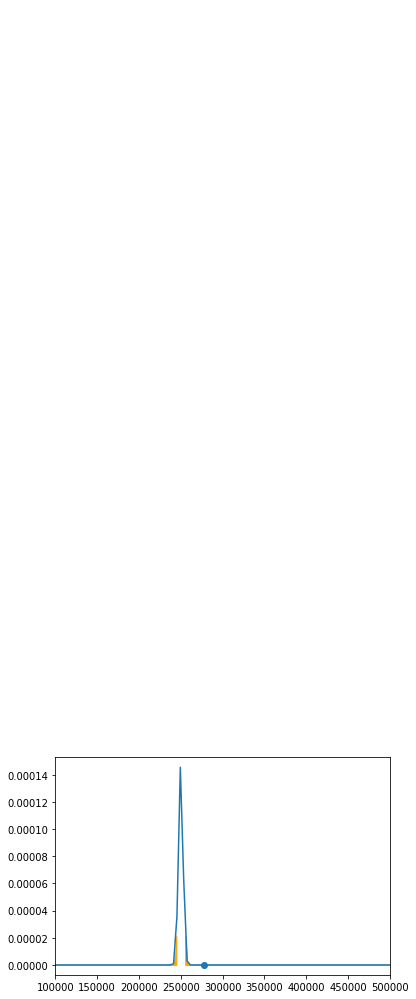

In [17]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 100000
x_max = 500000


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [18]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [19]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


* We reject the null hypothesis
* From above hypothesis we reject the claim of Times of india article.